# Assignment 2  <font color="blue"> (15 points) </font>
 
***

### General Instructions
  + You may need additional libraries besides the Python standard library to solve some questions. Import only necessary libraries. 
  + If more than one library exist for a same purpose, choose the one you wish as long as it does the task properly. 
  + If we want you to use a specific library, then we will state it clearly. 
  + Use the exact variable names asked in the questions. When no clear instructions given, feel free to do it the way you would like to.
  + After each question, add the needed number of new cells and place your answers inside the cells. 
  + Use text cells for explanations. Use explanation and plain text as much as possible. 
  + Do not remove or modify the original cells provided by the instructor.
  + In the following cell you will find some extra options to make your code more readable, including output colors RED, OKBLUE, or output text styles like BOLD or UNDERLINE that. Do not hesitate to use them. As an example, one may output text in red as follows: 
  ```python
     print(bcolors.RED + "your text" + bcolors.ENDC)
  ```
  + Comment your code whenever needed using # sign at the beginning of the row.
  + In some questions some of the details needed for solving the problem are **purposely** omitted to encourage additional self-directed research. This, especially, helps you develop some search skills for coding in Python (which is inevitable due to the inconsistent syntax of Python).
  + Do not hesitate to communicate your questions to the TA's or instructors. 
    
  Good luck! 

In [1]:

# The following piece of code gives the opportunity to show multiple outputs
# in one cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


# Colorful outputs
class bcolors:
    RED       = '\033[91m'
    OKBLUE    = '\033[94m'
    BOLD      = '\033[1m'
    UNDERLINE = '\033[4m'
    ENDC      = '\033[0m'

## **Part A** <font color="blue">(7 points)</font>

1. **<font color=blue> (1 point) </font>** Download `Credit.csv` from <http://www.statlearning.com/resources-first-edition> and upload it into this notebook. Print the first $5$ rows of the data. Using appropriate descriptive statistics or visualization methods describe the variables and possible association amongst them. Interpret the results. 
2. **<font color=blue> (0.5 points)</font>** Keep only `Income`, `Limit`, `Rating`, `Cards`, `Age`, `Education`, and `Balance` as your variables and throw the rest of variables away. Print the dimension of this new dataset. 
3.  **<font color=blue> (0.5 points) </font>** Create a binary variable `Balance_1500` which equals $1$ for the observations with `Balance` $> 1500$, and equals $0$ otherwise.
4. **<font color=blue> (3 points) </font>** Model `Balance_1500` by the explanatory variables `Income`, `Limit`, `Rating`, `Cards`, `Age`, `Education` using the following models: 
    + logistic regression, 
    + linear discriminant, and 
    + quadratic discriminant.
8. **<font color=blue> (0.5 points) </font>** Find the probability of (`Balance` $> 1500$), for the following values, using all three aforementionned methods:

|    Income    |    Limit     |     Rating     |    Cards     |      Age        |   Education   | 
|--------------|--------------|----------------|--------------|-----------------|---------------|
|      63      |    8100      |     600        |      4       |       30        |      13       |
|     186      |    13414     |     950        |      2       |       41        |      13       |

</br>
Compare the probabilities and comment.
    
9. **<font color=blue> (1.5 points) </font>** For each method, print the confusion matrix, the accuracy score and the AUC using all observations. Compare these metrics and comment. 

## **Part B** <font color="blue">(8 points)</font>

Donwload  `ziptrain.csv` and `ziptest.csv` datasets from  **Athena/Content/Data**. Save them and upload them here as **two separate datasets** and name them `ziptrain` and `ziptest`, respectively. Explore the data in order to understand it. 

  1. **<font color="blue">(1 point)</font>** From `ziptrain` dataset select only the rows corresponding to digits $2$ and $7$ and save them in a new dataset called `binar_train`. Do the same thing in `ziptest` and call it `binar_test`. 
  2. **<font color="blue">(1 point)</font>** Project `binar_train` onto the first **two principal components** and make a scatterplot of the data in the new space (two-dimensional space spanned by the frist two PCs). Use a different color (or marker) for each digit. Based on the plot do you think that these two digits can be separated well using only two PCs? Explain.
  3. **<font color="blue">(1 point)</font>** Fit a **logistic regression**, in the new space, to separate digits $2$ and $7$. 
  4. **<font color="blue">(1 point)</font>** Evaluate the trainded model on `binar_test` using **accuracy**, and an **appropriate F-measure**. 
  5. **<font color="blue">(0.5 points)</font>** Build and print a confusion matrix for your predictions.

For the rest of the questions use the **whole training data**, i.e., `ziptrain` (**not** `binar_train`). 

  6. **<font color="blue">(1 point)</font>** Project the whole data onto the first $m=2, 3, 4, 5$ principal components (one $m$ at a time).
  7. **<font color="blue">(1.5 points)</font>** For each $m$, and using **$5$-fold cross-validation**, train a **linear discriminant** classifier on `ziptrain`. 
  8. **<font color="blue">(1 point)</font>** Based on **cross-validated accuracy**, select the best number of principal components $m$.


----------

# Assignment 2  <font color="blue"> (15 points) </font>


##### Student Name: Yunting LU (Ines LU)
##### McGill ID: 261187435

# **Part A** <font color="blue">(7 points)</font>

### 1. **<font color=blue> (1 point) </font>** Download `Credit.csv` from <http://www.statlearning.com/resources-first-edition> and upload it into this notebook. Print the first $5$ rows of the data. Using appropriate descriptive statistics or visualization methods describe the variables and possible association amongst them. Interpret the results. 


In [21]:
import pandas as pd

# Read the CSV file
data = pd.read_csv('Credit.csv')

# the first 5 rows of the data
data.head()


,Income,Limit,Rating,Cards,Age,Education,Own,Student,Married,Region,Balance
0,14.891,3606,283,2,34,11,No,No,Yes,South,333
1,106.025,6645,483,3,82,15,Yes,Yes,Yes,West,903
2,104.593,7075,514,4,71,11,No,No,No,West,580
3,148.924,9504,681,3,36,11,Yes,No,No,West,964
4,55.882,4897,357,2,68,16,No,No,Yes,South,331


In [10]:
# Descriptive Statistics
data.describe()


,Income,Limit,Rating,Cards,Age,Education,Balance
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,45.218885,4735.600000,354.940000,2.957500,55.667500,13.450000,520.015000
std,35.244273,2308.198848,154.724143,1.371275,17.249807,3.125207,459.758877
min,10.354000,855.000000,93.000000,1.000000,23.000000,5.000000,0.000000
25%,21.007250,3088.000000,247.250000,2.000000,41.750000,11.000000,68.750000
50%,33.115500,4622.500000,344.000000,3.000000,56.000000,14.000000,459.500000
75%,57.470750,5872.750000,437.250000,4.000000,70.000000,16.000000,863.000000
max,186.634000,13913.000000,982.000000,9.000000,98.000000,20.000000,1999.000000


**[observations based on descriptive statistics]:**
- Income: The average income of individuals is approximately $45,218. The range of income varies from $10,354 to $186,634. The standard deviation indicates a relatively wide dispersion of incomes.

- Limit: The average credit limit on the credit card is $4,735.6, with a minimum value of $855 and a maximum value of $13,913. The standard deviation suggests some variation in credit limits.

- Rating: The average credit rating is approximately 354.94, with a minimum value of 93 and a maximum value of 982. The standard deviation indicates some variability in credit ratings.

- Cards: On average, individuals own approximately 2.96 credit cards. The number of cards ranges from 1 to 9, with a standard deviation suggesting some variation.

- Age: The average age of individuals is around 55.67 years. The age range varies from 23 to 98, indicating a wide age distribution.

- Education: The average education level is approximately 13.5 years. The range of education levels is from 11 to 20, indicating some variation in educational backgrounds.

- Balance: The average balance (debt) on the credit card is approximately $520. The balance ranges from 0 to 1999, indicating a wide range of debt levels. The standard deviation suggests some variability in the balances.

(array([80., 83., 62., 41., 23., 29., 18., 12.,  8.,  6.,  6.,  8.,  4.,
         4.,  3.,  4.,  3.,  2.,  0.,  4.]),
 array([ 10.354,  19.168,  27.982,  36.796,  45.61 ,  54.424,  63.238,
         72.052,  80.866,  89.68 ,  98.494, 107.308, 116.122, 124.936,
        133.75 , 142.564, 151.378, 160.192, 169.006, 177.82 , 186.634]),
 <BarContainer object of 20 artists>)

Text(0.5, 0, 'Income')

Text(0, 0.5, 'Frequency')

(array([23., 28., 31., 47., 42., 42., 60., 33., 25., 17., 20.,  8.,  6.,
         5.,  5.,  3.,  1.,  2.,  0.,  2.]),
 array([  855. ,  1507.9,  2160.8,  2813.7,  3466.6,  4119.5,  4772.4,
         5425.3,  6078.2,  6731.1,  7384. ,  8036.9,  8689.8,  9342.7,
         9995.6, 10648.5, 11301.4, 11954.3, 12607.2, 13260.1, 13913. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 0, 'Limit')

Text(0, 0.5, 'Frequency')

(array([108.,  30.,  22.,  23.,  26.,  27.,  25.,  22.,  24.,  24.,  22.,
         10.,  11.,  10.,   7.,   4.,   2.,   1.,   1.,   1.]),
 array([   0.  ,   99.95,  199.9 ,  299.85,  399.8 ,  499.75,  599.7 ,
         699.65,  799.6 ,  899.55,  999.5 , 1099.45, 1199.4 , 1299.35,
        1399.3 , 1499.25, 1599.2 , 1699.15, 1799.1 , 1899.05, 1999.  ]),
 <BarContainer object of 20 artists>)

Text(0.5, 0, 'Balance')

Text(0, 0.5, 'Frequency')

Text(0.5, 0, 'Income')

Text(0, 0.5, 'Limit')

Text(0.5, 0, 'Rating')

Text(0, 0.5, 'Age')

<BarContainer object of 3 artists>

Text(0.5, 0, 'Region')

Text(0, 0.5, 'Count')

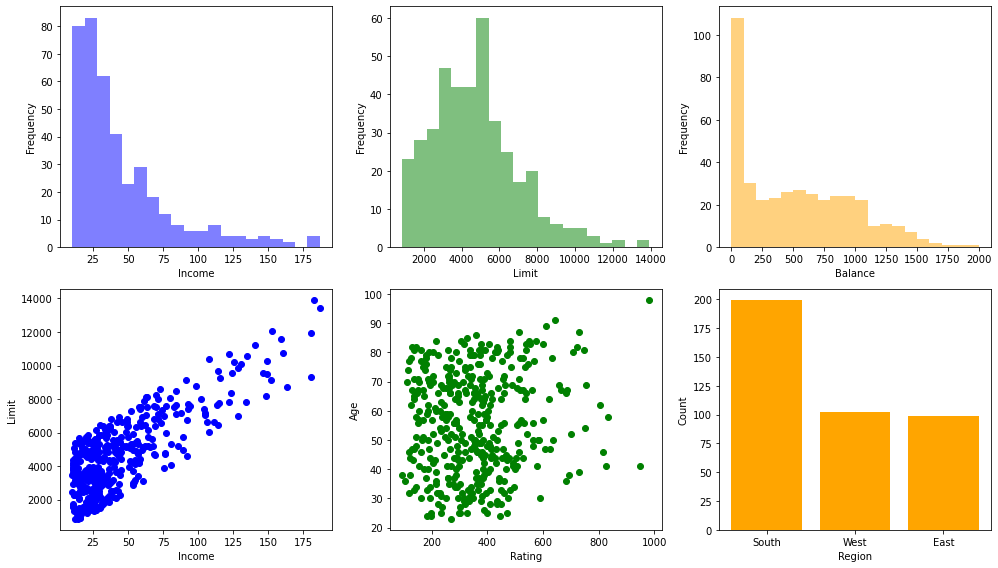

In [24]:
# visualizations option#1
import matplotlib.pyplot as plt

# Create subplots with 2 rows and 3 columns
fig, axes = plt.subplots(2, 3, figsize=(14, 8))

# Plot histogram for Income
axes[0, 0].hist(data['Income'], bins=20, alpha=0.5, color='blue')
axes[0, 0].set_xlabel('Income')
axes[0, 0].set_ylabel('Frequency')

# Plot histogram for Limit
axes[0, 1].hist(data['Limit'], bins=20, alpha=0.5, color='green')
axes[0, 1].set_xlabel('Limit')
axes[0, 1].set_ylabel('Frequency')

# Plot histogram for Balance
axes[0, 2].hist(data['Balance'], bins=20, alpha=0.5, color='orange')
axes[0, 2].set_xlabel('Balance')
axes[0, 2].set_ylabel('Frequency')

# Plot scatter plot of Income vs. Limit
axes[1, 0].scatter(data['Income'], data['Limit'], color='blue')
axes[1, 0].set_xlabel('Income')
axes[1, 0].set_ylabel('Limit')

# Scatter plot of Rating vs. Age
axes[1, 1].scatter(data['Rating'], data['Age'], color='green')
axes[1, 1].set_xlabel('Rating')
axes[1, 1].set_ylabel('Age')

# Plot bar plot of regions
region_counts = data['Region'].value_counts()
axes[1, 2].bar(region_counts.index, region_counts.values, color='orange')
axes[1, 2].set_xlabel('Region')
axes[1, 2].set_ylabel('Count')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plots
plt.show()


**[observations based on visualization]:**
1. Income:
    The histogram of the Income variable shows a right-skewed distribution, as indicated by the longer tail on the right side of the histogram.
    The majority of individuals have incomes between $10,354 and $54,424, with the highest frequency occurring in the range of $40,000 to $50,000.
    There are a few individuals with higher incomes above $100,000, as shown by the tail of the distribution.

2. Limit:
    The histogram of the Limit variable shows a roughly normal distribution, with a peak around $5,000 to $7,000.
    The credit limits range from $855 to $13,913, with most individuals having credit limits between $3,000 and $6,000.
    There are a smaller number of individuals with higher credit limits above $10,000.

3. Balance:
    The histogram of the Balance variable shows a right-skewed distribution, with a peak around $0 to $500.
    The majority of individuals have relatively low balances, with a considerable number having balances close to zero.
    There are a few individuals with higher balances, reaching up to the maximum value of $1,999.

4. Income vs. Limit Scatter Plot:
    The scatter plot shows a positive relationship between Income and Limit, particularly in the range of Limit values between 0 and 8000 and Income values between 0 and 60.

5. Rating vs. Age Scatter Plot:
    The scatter plot shows the relationship between Rating and Age. 
    Even though there doesn't appear to be a clear linear or obvious relationship, most of the data points are concentrated in the range of Rating values between 0 and 500 and Age values between 20 and 80.

6. Region:
    The bar plot shows the count of individuals in each region.
    The majority of individuals reside in the West region, followed by the South and Midwest regions, with the fewest individuals in the Northeast region.

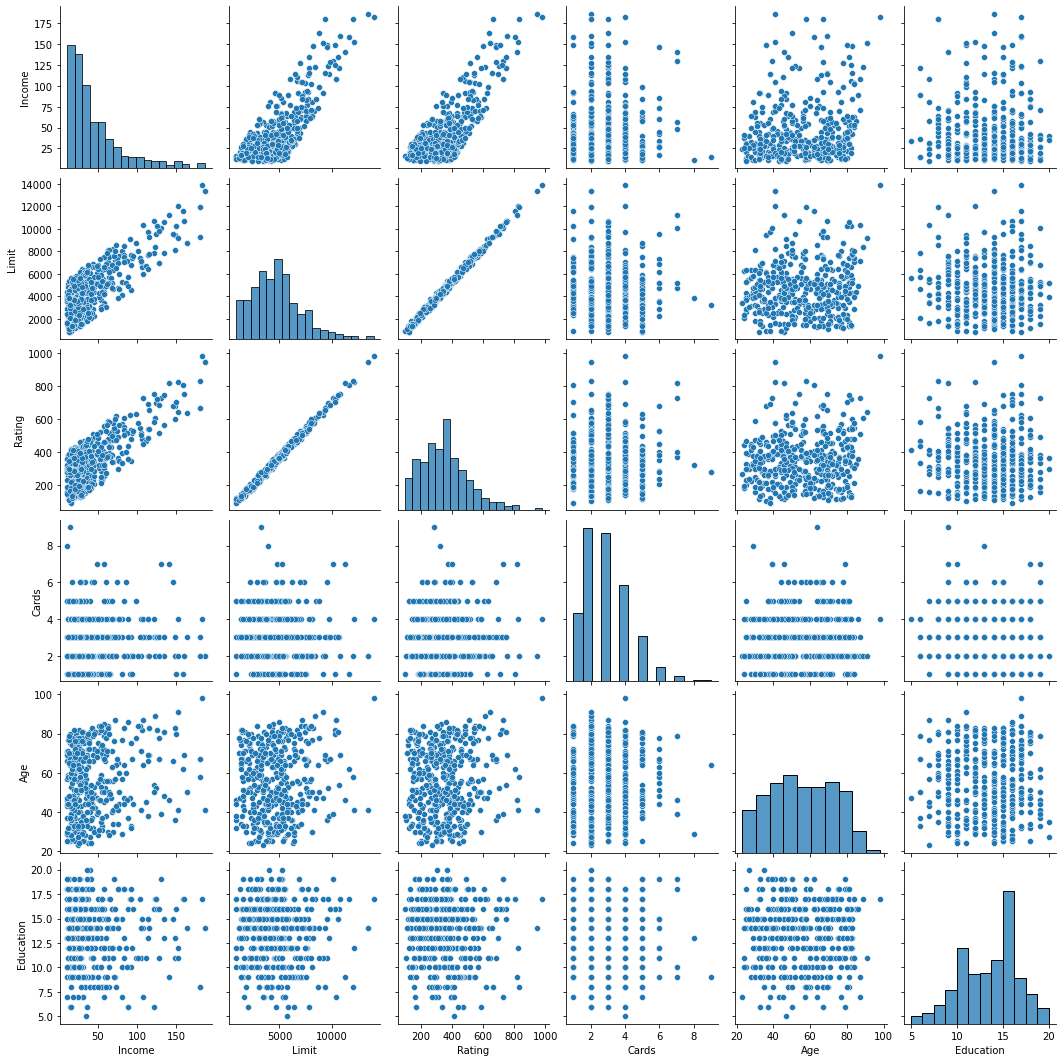

In [40]:
# visualizations option#2
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X is a pandas DataFrame or a numpy array with numerical columns(workbook_05)
pairplot = sns.pairplot(X)
plt.show()

**[observations based on visualization]:**

As can be seen from the plots above, Income, Limit and Rating are showing positive associations, more specifically:    

- Income vs. Limit: There is a positive linear relationship between Income and Limit. As Income increases, Limit tends to increase as well. The scatter plot shows a generally upward trend, indicating that individuals with higher incomes tend to have higher credit limits. The slope of the relationship is positive.

- Income vs. Rating: Similar to the previous plot, there is a positive linear relationship between Income and Rating. As Income increases, Rating also tends to increase. The scatter plot exhibits an upward trend, suggesting that individuals with higher incomes generally have higher credit ratings. The slope of this relationship is also positive and comparable to the slope of the Income vs. Limit plot.

- Limit vs. Rating: In this scatter plot, there is also a positive relationship between Limit and Rating. However, the relationship appears to be slightly steeper or narrower compared to the other two plots. As Limit increases, Rating tends to increase as well. This indicates that higher credit limits are often associated with higher credit ratings, and suggests stronger relationships between Income vs. Limit and Income vs. Rating.

Overall, the scatter plots confirm the positive associations among the three variables. Higher income levels tend to be associated with higher credit limits and higher credit ratings. Additionally, the relationship between credit limit and credit rating suggests that individuals with higher credit limits often have higher credit ratings, and the strength of this relationship is stronger compared to the relationships with income.


----

### 2. **<font color=blue> (0.5 points)</font>** Keep only `Income`, `Limit`, `Rating`, `Cards`, `Age`, `Education`, and `Balance` as your variables and throw the rest of variables away. Print the dimension of this new dataset. 


In [25]:
# Select the desired variables
new_data = data[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education', 'Balance']]

# Print the dimensions of the new dataset
print(new_data.shape)


(400, 7)


### 3.  **<font color=blue> (0.5 points) </font>** Create a binary variable `Balance_1500` which equals $1$ for the observations with `Balance` $> 1500$, and equals $0$ otherwise.


In [48]:
import numpy as np

# Creating the binary variable Balance_1500
data['Balance_1500'] = np.where(data['Balance'] > 1500, 1, 0)


### 4. **<font color=blue> (3 points) </font>** Model `Balance_1500` by the explanatory variables `Income`, `Limit`, `Rating`, `Cards`, `Age`, `Education` using the following models: 
    - logistic regression, 
    - linear discriminant, and 
    - quadratic discriminant.


In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

# Splitting the dataset into features (X) and target variable (y)
X = data[['Income', 'Limit', 'Rating', 'Cards', 'Age', 'Education']]
y = data['Balance_1500']

# Scale the data
scaler = StandardScaler(with_mean=False, with_std=True)
X_scaled = scaler.fit_transform(X)

# Logistic Regression with increased max_iter
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_scaled, y)

# Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_scaled, y)

# Quadratic Discriminant Analysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_scaled, y)



LogisticRegression(max_iter=1000)

LinearDiscriminantAnalysis()

QuadraticDiscriminantAnalysis()

### 5. **<font color=blue> (0.5 points) </font>** Find the probability of (`Balance` $> 1500$), for the following values, using all three aforementionned methods:

|    Income    |    Limit     |     Rating     |    Cards     |      Age        |   Education   | 
|--------------|--------------|----------------|--------------|-----------------|---------------|
|      63      |    8100      |     600        |      4       |       30        |      13       |
|     186      |    13414     |     950        |      2       |       41        |      13       |

</br>
Compare the probabilities and comment.
    
 

In [55]:
# Define the values for prediction
values = np.array([[63, 8100, 600, 4, 30, 13],
                   [186, 13414, 950, 2, 41, 13]])

# Scale the values
values_scaled = scaler.transform(values)

# Predict probabilities using logistic regression
logreg_probs = logreg.predict_proba(values_scaled)[:, 1]

# Predict probabilities using linear discriminant analysis
lda_probs = lda.predict_proba(values_scaled)[:, 1]

# Predict probabilities using quadratic discriminant analysis
qda_probs = qda.predict_proba(values_scaled)[:, 1]

# Print the probabilities
print("Logistic Regression Probabilities:", logreg_probs)
print("Linear Discriminant Analysis Probabilities:", lda_probs)
print("Quadratic Discriminant Analysis Probabilities:", qda_probs)


Logistic Regression Probabilities: [0.12700032 0.84305748]
Linear Discriminant Analysis Probabilities: [0.05949012 0.99278801]
Quadratic Discriminant Analysis Probabilities: [4.93626009e-09 9.99216942e-01]


d:\Users\Yunting\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


[Compare the probabilities and comment]

Based on the provided probabilities for Balance > 1500,  the results of the three methods are as follows:
+ Logistic Regression Probabilities: [0.12700032 0.84305748]
+ Linear Discriminant Analysis Probabilities: [0.05949012 0.99278801]
+ Quadratic Discriminant Analysis Probabilities: [4.93626009e-09 9.99216942e-01]
    
Comparison:
- Logistic Regression Probabilities:
    - For the first set of values [63, 8100, 600, 4, 30, 13], the probability of Balance > 1500 is approximately 0.127, indicating a moderate likelihood.
    - For the second set of values [186, 13414, 950, 2, 41, 13], the probability of Balance > 1500 is approximately 0.843, indicating a higher likelihood.
- Linear Discriminant Analysis Probabilities:
    - For the first set of values [63, 8100, 600, 4, 30, 13], the probability of Balance > 1500 is approximately 0.0595, indicating a relatively low likelihood.
    - For the second set of values [186, 13414, 950, 2, 41, 13], the probability of Balance > 1500 is approximately 0.993, indicating a very high likelihood.
- Quadratic Discriminant Analysis Probabilities:
    - For the first set of values [63, 8100, 600, 4, 30, 13], the probability of Balance > 1500 is approximately 4.94e-09, indicating an extremely low likelihood.
    - For the second set of values [186, 13414, 950, 2, 41, 13], the probability of Balance > 1500 is approximately 0.999, indicating a very high likelihood.

Comparing the probabilities across the three methods, we observe variations in the predicted probabilities for each set of values:
- **Logistic regression** and **linear discriminant analysis** provide similar probabilities for the first set of values, with logistic regression indicating a moderate likelihood and linear discriminant analysis indicating a relatively low likelihood of Balance > 1500. However, for the second set of values, both methods indicate a higher likelihood of Balance > 1500, with logistic regression providing a higher probability.
- **Quadratic discriminant** analysis provides contrasting probabilities, with an extremely low likelihood for the first set of values and a very high likelihood for the second set of values.

### 6. **<font color=blue> (1.5 points) </font>** For each method, print the confusion matrix, the accuracy score and the AUC using all observations. Compare these metrics and comment.

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score

# Predict probabilities using logistic regression
logreg_probs = logreg.predict_proba(X_scaled)[:, 1]
logreg_predictions = (logreg_probs > 0.5).astype(int)

# Predict probabilities using linear discriminant analysis
lda_probs = lda.predict_proba(X_scaled)[:, 1]
lda_predictions = (lda_probs > 0.5).astype(int)

# Predict probabilities using quadratic discriminant analysis
qda_probs = qda.predict_proba(X_scaled)[:, 1]
qda_predictions = (qda_probs > 0.5).astype(int)

# Confusion matrix, accuracy score, and AUC for logistic regression
logreg_cm = confusion_matrix(y, logreg_predictions)
logreg_accuracy = accuracy_score(y, logreg_predictions)
logreg_auc = roc_auc_score(y, logreg_probs)

# Confusion matrix, accuracy score, and AUC for linear discriminant analysis
lda_cm = confusion_matrix(y, lda_predictions)
lda_accuracy = accuracy_score(y, lda_predictions)
lda_auc = roc_auc_score(y, lda_probs)

# Confusion matrix, accuracy score, and AUC for quadratic discriminant analysis
qda_cm = confusion_matrix(y, qda_predictions)
qda_accuracy = accuracy_score(y, qda_predictions)
qda_auc = roc_auc_score(y, qda_probs)

# Print the metrics for each method
print("Logistic Regression Metrics:")
print("Confusion Matrix:")
print(logreg_cm)
print("Accuracy Score:", logreg_accuracy)
print("AUC:", logreg_auc)

print("\nLinear Discriminant Analysis Metrics:")
print("Confusion Matrix:")
print(lda_cm)
print("Accuracy Score:", lda_accuracy)
print("AUC:", lda_auc)

print("\nQuadratic Discriminant Analysis Metrics:")
print("Confusion Matrix:")
print(qda_cm)
print("Accuracy Score:", qda_accuracy)
print("AUC:", qda_auc)


Logistic Regression Metrics:
Confusion Matrix:
[[390   1]
 [  5   4]]
Accuracy Score: 0.985
AUC: 0.9730036942313158

Linear Discriminant Analysis Metrics:
Confusion Matrix:
[[383   8]
 [  4   5]]
Accuracy Score: 0.97
AUC: 0.9516908212560387

Quadratic Discriminant Analysis Metrics:
Confusion Matrix:
[[390   1]
 [  2   7]]
Accuracy Score: 0.9925
AUC: 0.9948849104859335


**[Compare these metrics and comment]**

Logistic Regression Metrics:

    Confusion Matrix:
        True Positive (TP): 4
        True Negative (TN): 390
        False Positive (FP): 1
        False Negative (FN): 5
    Accuracy Score: 0.985
    Area Under the Receiver Operating Characteristic Curve (AUC): 0.973

Linear Discriminant Analysis Metrics:

    Confusion Matrix:
        TP: 5
        TN: 383
        FP: 8
        FN: 4
    Accuracy Score: 0.97
    AUC: 0.952

Quadratic Discriminant Analysis Metrics:

    Confusion Matrix:
        TP: 7
        TN: 390
        FP: 1
        FN: 2
    Accuracy Score: 0.9925
    AUC: 0.995

Comparing the metrics for the three methods:

    Accuracy Score: Logistic Regression (0.985) > Quadratic Discriminant Analysis (0.9925) > Linear Discriminant Analysis (0.97)
    AUC: Quadratic Discriminant Analysis (0.995) > Logistic Regression (0.973) > Linear Discriminant Analysis (0.952)

[Conclusion]:

The **logistic regression model** achieves the highest accuracy score among the three methods, followed by quadratic discriminant analysis and linear discriminant analysis. 

However, when considering the AUC, which measures the model's ability to discriminate between positive and negative classes, **quadratic discriminant analysis** performs the best, followed by logistic regression and then linear discriminant analysis.

------


# **Part B** <font color="blue">(8 points)</font>


### Donwload  `ziptrain.csv` and `ziptest.csv` datasets from  **Athena/Content/Data**. Save them and upload them here as **two separate datasets** and name them `ziptrain` and `ziptest`, respectively. Explore the data in order to understand it. 



In [2]:
import pandas as pd

# Loading the datasets
ziptrain = pd.read_csv('ziptrain.csv')
ziptest = pd.read_csv('ziptest.csv')

# Exploring the data
print(ziptrain.head())
print(ziptest.head())


  6.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -0.6310 0.8620 -0.1670 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -0.9920 0.2970 1.0000 0.3070 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -0.4100 1.0000 0.9860 -0.5650 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -0.6830 0.8250 1.0000 0.5620 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -0.9380 0.5400 1.0000 0.7780 -0.7150 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 0.1000 1.0000 0.9220 -0.4390 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -0.2570 0.9500 1.0000 -0.1620 -1.0000 -1.0000 -1.0000 -0.9870 -0.7140 -0.8320 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -0.7970 0.9090 1.0000 0.3000 -0.9610 -1.0000 -1.0000 -0.5500 0.4850 0.9960 0.8670 0.0920 -1.0000

In [3]:
# Exploring the data for ziptrain
print(ziptrain.dtypes)
print(ziptrain.shape)   
# For ziptest dataframe
print(ziptest.dtypes)
print(ziptest.shape)     

6.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -0.6310 0.8620 -0.1670 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -0.9920 0.2970 1.0000 0.3070 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -0.4100 1.0000 0.9860 -0.5650 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -0.6830 0.8250 1.0000 0.5620 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -0.9380 0.5400 1.0000 0.7780 -0.7150 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 0.1000 1.0000 0.9220 -0.4390 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -0.2570 0.9500 1.0000 -0.1620 -1.0000 -1.0000 -1.0000 -0.9870 -0.7140 -0.8320 -1.0000 -1.0000 -1.0000 -1.0000 -1.0000 -0.7970 0.9090 1.0000 0.3000 -0.9610 -1.0000 -1.0000 -0.5500 0.4850 0.9960 0.8670 0.0920 -1.0000 -

In [4]:
# As can be seen from the last step, the data type is object and weirdly every data is stored in one column! So I'm gonna do the following steps

# split the data
ziptrain.iloc[:, 0] = ziptrain.iloc[:, 0].astype(str)      # convert dtype to string in order to spilit
ziptrain = ziptrain.iloc[:, 0].str.split(" ", expand=True)  # split based on ' ' 
ziptrain = ziptrain.apply(pd.to_numeric, errors='coerce')    # convert dtype to numeric

print(ziptrain.head())
print(ziptrain.dtypes)
print(ziptrain.shape) 


   0    1    2    3      4      5      6      7      8      9    ...    248  \
0  5.0 -1.0 -1.0 -1.0 -0.813 -0.671 -0.809 -0.887 -0.671 -0.853  ... -0.671   
1  4.0 -1.0 -1.0 -1.0 -1.000 -1.000 -1.000 -1.000 -1.000 -1.000  ... -1.000   
2  7.0 -1.0 -1.0 -1.0 -1.000 -1.000 -0.273  0.684  0.960  0.450  ...  1.000   
3  3.0 -1.0 -1.0 -1.0 -1.000 -1.000 -0.928 -0.204  0.751  0.466  ...  0.639   
4  6.0 -1.0 -1.0 -1.0 -1.000 -1.000 -0.397  0.983 -0.535 -1.000  ...  0.015   

     249    250    251    252    253    254    255  256  257  
0 -0.033  0.761  0.762  0.126 -0.095 -0.671 -0.828 -1.0  NaN  
1 -1.000 -0.109  1.000 -0.179 -1.000 -1.000 -1.000 -1.0  NaN  
2  0.536 -0.987 -1.000 -1.000 -1.000 -1.000 -1.000 -1.0  NaN  
3  1.000  1.000  0.791  0.439 -0.199 -0.883 -1.000 -1.0  NaN  
4 -0.862 -0.871 -0.437 -1.000 -1.000 -1.000 -1.000 -1.0  NaN  

[5 rows x 258 columns]
0      float64
1      float64
2      float64
3      float64
4      float64
        ...   
253    float64
254    float64
255

In [5]:
# same steps for ziptest
ziptest.iloc[:, 0] = ziptest.iloc[:, 0].astype(str)      # convert dtype to string in order to spilit
ziptest = ziptest.iloc[:, 0].str.split(" ", expand=True)  # split based on ' ' 
ziptest = ziptest.apply(pd.to_numeric, errors='coerce')    # convert dtype to numeric

print(ziptest.head())
print(ziptest.dtypes)
print(ziptest.shape) 

   0    1    2    3      4    5    6      7      8      9    ...    247  \
0    6 -1.0 -1.0 -1.0 -1.000 -1.0 -1.0 -1.000 -1.000 -1.000  ... -1.000   
1    3 -1.0 -1.0 -1.0 -0.593  0.7  1.0  1.000  1.000  1.000  ...  1.000   
2    6 -1.0 -1.0 -1.0 -1.000 -1.0 -1.0 -1.000 -1.000 -1.000  ... -1.000   
3    6 -1.0 -1.0 -1.0 -1.000 -1.0 -1.0 -1.000 -0.858 -0.106  ...  0.901   
4    0 -1.0 -1.0 -1.0 -1.000 -1.0 -1.0  0.195  1.000  0.054  ...  0.224   

     248    249    250    251    252    253  254  255  256  
0 -1.000 -1.000 -1.000 -1.000 -1.000 -1.000 -1.0 -1.0 -1.0  
1  0.717  0.333  0.162 -0.393 -1.000 -1.000 -1.0 -1.0 -1.0  
2 -1.000 -1.000 -1.000 -1.000 -1.000 -1.000 -1.0 -1.0 -1.0  
3  0.901  0.901  0.290 -0.369 -0.867 -1.000 -1.0 -1.0 -1.0  
4  1.000  0.988  0.187  0.139 -0.641 -0.812 -1.0 -1.0 -1.0  

[5 rows x 257 columns]
0        int64
1      float64
2      float64
3      float64
4      float64
        ...   
252    float64
253    float64
254    float64
255    float64
256    fl

###  1. **<font color="blue">(1 point)</font>** From `ziptrain` dataset select only the rows corresponding to digits $2$ and $7$ and save them in a new dataset called `binar_train`. Do the same thing in `ziptest` and call it `binar_test`. 


In [6]:
# Select rows corresponding to digits 2 and 7
binar_train = ziptrain[(ziptrain.iloc[:, 0] == 2) | (ziptrain.iloc[:, 0] == 7)]
binar_test = ziptest[(ziptest.iloc[:, 0] == 2) | (ziptest.iloc[:, 0] == 7)]

print(binar_train.head())
print(binar_train.shape) 
print(binar_test.head())
print(binar_test.shape) 


    0    1    2    3      4      5      6      7      8      9    ...    248  \
2   7.0 -1.0 -1.0 -1.0 -1.000 -1.000 -0.273  0.684  0.960  0.450  ...  1.000   
9   7.0 -1.0 -1.0 -1.0 -1.000 -1.000 -0.596  0.912  1.000  0.290  ... -0.795   
13  7.0 -1.0 -1.0 -1.0 -1.000 -1.000 -1.000 -1.000 -1.000 -0.632  ... -0.967   
14  7.0 -1.0 -1.0 -1.0 -0.929  0.351  0.798  0.806  0.114  0.015  ... -0.086   
21  7.0 -1.0 -1.0 -1.0 -1.000 -0.869  0.777 -0.007 -0.697 -1.000  ...  0.667   

      249    250  251  252  253  254  255  256  257  
2   0.536 -0.987 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  NaN  
9   0.663 -0.074 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  NaN  
13  0.866 -0.001 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  NaN  
14 -0.991 -1.000 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  NaN  
21 -0.315 -1.000 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  NaN  

[5 rows x 258 columns]
(1376, 258)
    0      1      2      3      4      5      6      7      8      9    ...  \
10    2 -0.996  0.572  0.396  0.063 -0.506 -0.847 -1.000 -1.000 -1.000  ...   
1

###  2. **<font color="blue">(1 point)</font>** Project `binar_train` onto the first **two principal components** and make a scatterplot of the data in the new space (two-dimensional space spanned by the frist two PCs). Use a different color (or marker) for each digit. Based on the plot do you think that these two digits can be separated well using only two PCs? Explain.
  

In [8]:
import numpy as np
# Check for NaN values
has_nan = np.isnan(binar_train).any()
has_nan

0      False
1      False
2      False
3      False
4      False
       ...  
253    False
254    False
255    False
256    False
257     True
Length: 258, dtype: bool

In [10]:
# okay, for the last column, they only have NaN values
# so let's just drop them
binar_train = binar_train.dropna(axis=1)

# check again
has_nan = np.isnan(binar_train).any()


0      False
1      False
2      False
3      False
4      False
       ...  
252    False
253    False
254    False
255    False
256    False
Length: 257, dtype: bool

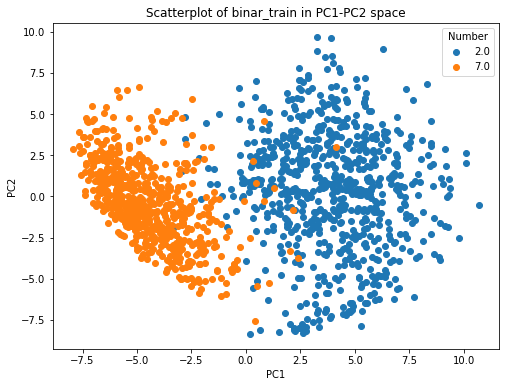

In [32]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Separate the numbers and features
numbers = binar_train.iloc[:, 0]
features = binar_train.iloc[:, 1:]

# Perform PCA
pca = PCA(n_components=2)
pca.fit(features)
transformed_data = pca.transform(features)

# Create a scatterplot
plt.figure(figsize=(8, 6))
for number in np.unique(numbers):
    plt.scatter(
        transformed_data[numbers == number, 0],
        transformed_data[numbers == number, 1],
        label=str(number)
    )

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Scatterplot of binar_train in PC1-PC2 space")
plt.legend(title="Number")
plt.show()


**[Based on the plot do you think that these two digits can be separated well using only two PCs? Explain.]**

As can be seen from the scatterplot, it suggests that digits 7 and 2 can be separated relatively well using only two principal components (PCs).

The key reasons supporting this conclusion are:

1. **Clear separation:** The data points for digits 7 and 2 occupy distinct regions in the scatterplot, indicating a visible separation between the two digits. The data points for digit 7 tend to cluster around (-7.5, -2.5) for PC1 and (-5, 2.5) for PC2, while the data points for digit 2 are more scattered but tend to center around (0, 7.5) for PC1 and (-2.5, 5) for PC2. This separation suggests that the two digits have different distributions along the principal components.

2. **Overlap considerations:** While some overlap exist between the data points of the two digits, the overall separation between the clusters of digit 7 and digit 2 is visually discernible. It is expected that a classifier or decision boundary based on these two principal components would be able to distinguish between the two digits with reasonable accuracy.

3. **Limited dimensionality:** With only two principal components, the scatterplot provides a two-dimensional representation of the data. Despite this reduction in dimensionality, the separation between the digits is still noticeable. This implies that the most critical information for distinguishing between the digits is captured by these two components.


### 3. **<font color="blue">(1 point)</font>** Fit a **logistic regression**, in the new space, to separate digits $2$ and $7$. 


In [33]:
from sklearn.linear_model import LogisticRegression
# Filter the data and labels for digits 2 and 7
indices_2 = numbers == 2
indices_7 = numbers == 7
filtered_data = transformed_data[np.logical_or(indices_2, indices_7)]
filtered_labels = numbers[np.logical_or(indices_2, indices_7)]

# Create a Logistic Regression model
logreg = LogisticRegression()

# Fit the model on the filtered data and labels
logreg.fit(filtered_data, filtered_labels)

LogisticRegression()

###  4. **<font color="blue">(1 point)</font>** Evaluate the trainded model on `binar_test` using **accuracy**, and an **appropriate F-measure**. 


In [42]:
from sklearn.metrics import accuracy_score, f1_score

# Separate the numbers and features
numbers_test = binar_test.iloc[:, 0]
features_test = binar_test.iloc[:, 1:]

# Perform the same PCA transformation as done for the training data
transformed_features_test = pca.transform(features_test)

# Filter the test data and labels for digits 2 and 7
indices_2 = numbers_test == 2
indices_7 = numbers_test == 7
filtered_features_test = transformed_features_test[np.logical_or(indices_2, indices_7)]
filtered_numbers_test = numbers_test[np.logical_or(indices_2, indices_7)]

# Predict the labels for the filtered test data
predictions = logreg.predict(filtered_features_test)

# Calculate accuracy
accuracy = accuracy_score(filtered_numbers_test, predictions)
print(f'accuracy: {accuracy}')

# Calculate F-measure
f_measure = f1_score(filtered_numbers_test, predictions, average='weighted')
print(f'f_measure: {f_measure}')

accuracy: 0.9652173913043478
f_measure: 0.9651856662706025


**[Evaluation of the trained model]**

Based on the evaluation of the trained model on the binar_test dataset, the accuracy score is approximately 0.9652, and the F-measure is approximately 0.9652 as well.

- The accuracy score of 0.9652 suggests that the logistic regression model correctly classified approximately 96.52% of the test samples.

- The F-measure of 0.9652 indicates a good balance between precision and recall, considering the weighted average across all classes. It takes into account both the accuracy and imbalance in the dataset.

Both metrics indicate that the logistic regression model performed well on the binar_test dataset in distinguishing between digits 2 and 7.

###  5. **<font color="blue">(0.5 points)</font>** Build and print a confusion matrix for your predictions.

In [44]:
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
confusion_mat = confusion_matrix(filtered_numbers_test, predictions)

# Print the confusion matrix
print('confusion matrix:')
print(confusion_mat)


confusion matrix:
[[193   5]
 [  7 140]]


## For the rest of the questions use the **whole training data**, i.e., `ziptrain` (**not** `binar_train`). 


###  6. **<font color="blue">(1 point)</font>** Project the whole data onto the first $m=2, 3, 4, 5$ principal components (one $m$ at a time).


In [48]:
print(type(ziptrain))
print(ziptrain.shape)
print(ziptrain.head())


<class 'pandas.core.frame.DataFrame'>
(7290, 258)
   0    1    2    3      4      5      6      7      8      9    ...    248  \
0  5.0 -1.0 -1.0 -1.0 -0.813 -0.671 -0.809 -0.887 -0.671 -0.853  ... -0.671   
1  4.0 -1.0 -1.0 -1.0 -1.000 -1.000 -1.000 -1.000 -1.000 -1.000  ... -1.000   
2  7.0 -1.0 -1.0 -1.0 -1.000 -1.000 -0.273  0.684  0.960  0.450  ...  1.000   
3  3.0 -1.0 -1.0 -1.0 -1.000 -1.000 -0.928 -0.204  0.751  0.466  ...  0.639   
4  6.0 -1.0 -1.0 -1.0 -1.000 -1.000 -0.397  0.983 -0.535 -1.000  ...  0.015   

     249    250    251    252    253    254    255  256  257  
0 -0.033  0.761  0.762  0.126 -0.095 -0.671 -0.828 -1.0  NaN  
1 -1.000 -0.109  1.000 -0.179 -1.000 -1.000 -1.000 -1.0  NaN  
2  0.536 -0.987 -1.000 -1.000 -1.000 -1.000 -1.000 -1.0  NaN  
3  1.000  1.000  0.791  0.439 -0.199 -0.883 -1.000 -1.0  NaN  
4 -0.862 -0.871 -0.437 -1.000 -1.000 -1.000 -1.000 -1.0  NaN  

[5 rows x 258 columns]


In [50]:
# You see for the last column, they only have NaN values like binar_train
# so let's just drop them again
ziptrain = ziptrain.dropna(axis=1)

# check again
has_nan_z = np.isnan(ziptrain).any()
has_nan_z

0      False
1      False
2      False
3      False
4      False
       ...  
252    False
253    False
254    False
255    False
256    False
Length: 257, dtype: bool

In [52]:
# Separate the numbers and features
numbers_train = ziptrain.iloc[:, 0].values
features_train = ziptrain.iloc[:, 1:].values

# Define the list of values for m
m_values = [2, 3, 4, 5]

# Perform PCA for each value of m
for m in m_values:
    # Create PCA instance with the desired number of components
    pca = PCA(n_components=m)
    
    # Fit the PCA model on the training features
    pca.fit(features_train)
    
    # Transform the training features to the m-dimensional space
    transformed_features_train = pca.transform(features_train)
    print(f"Shape of the transformed features for m={m}: {transformed_features_train.shape}")


Shape of the transformed features for m=2: (7290, 2)
Shape of the transformed features for m=3: (7290, 3)
Shape of the transformed features for m=4: (7290, 4)
Shape of the transformed features for m=5: (7290, 5)


###  7. **<font color="blue">(1.5 points)</font>** For each $m$, and using **$5$-fold cross-validation**, train a **linear discriminant** classifier on `ziptrain`. 


In [63]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

# Perform cross-validation for each value of m
for m in m_values:
    # Create PCA instance with the desired number of components
    pca = PCA(n_components=m)
    
    # Fit the PCA model on the training features
    pca.fit(features_train)
    
    # Transform the training features to the m-dimensional space
    transformed_features_train = pca.transform(features_train)
    
    # Perform k-fold cross-validation
    kf = KFold(n_splits=k)
    fold_accuracy = []
    
    for train_index, test_index in kf.split(transformed_features_train):
        X_train, X_test = transformed_features_train[train_index], transformed_features_train[test_index]
        y_train, y_test = numbers_train[train_index], numbers_train[test_index]
        
        # Create and fit the linear discriminant classifier
        lda = LinearDiscriminantAnalysis()
        lda.fit(X_train, y_train)
        
        # Predict the labels for the test data
        predictions = lda.predict(X_test)
        
        # Calculate the accuracy of the predictions
        accuracy = accuracy_score(y_test, predictions)
        fold_accuracy.append(accuracy)
    
    # Calculate the mean accuracy across all folds for the current value of m
    mean_accuracy = np.mean(fold_accuracy)
    
    # Print the mean accuracy for the current value of m
    print(f"cross-validated accuracy for m={m}: {mean_accuracy}")


cross-validated accuracy for m=2: 0.5377229080932785
cross-validated accuracy for m=3: 0.5813443072702332
cross-validated accuracy for m=4: 0.6925925925925926
cross-validated accuracy for m=5: 0.7186556927297668


###  8. **<font color="blue">(1 point)</font>** Based on **cross-validated accuracy**, select the best number of principal components $m$.

**[select the best number of principal components $m$]**

Based on the aboved cross-validated accuracy results, it can be observed that the mean accuracy increases as the number of principal components m increases. The highest mean accuracy is achieved for m=5, with a value of 0.7187. 

Therefore, **m=5** can be considered as the best number of principal components based on cross-validated accuracy.